In [6]:
cd /home/randolpwanjiru/DSP4380/Computer Vision/dataloader

/home/randolpwanjiru/DSP4380/Computer Vision/dataloader


In [11]:
ls

Dataloader.ipynb  Dataloader.py


Dataloader.ipynb  Dataloader.py  __pycache__
Found 202 files belonging to 2 classes.
Using 162 files for training.
Using 40 files for validation.


2024-04-24 19:54:44.303228: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:3b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-24 19:54:44.306121: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-04-24 19:54:45.653117: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


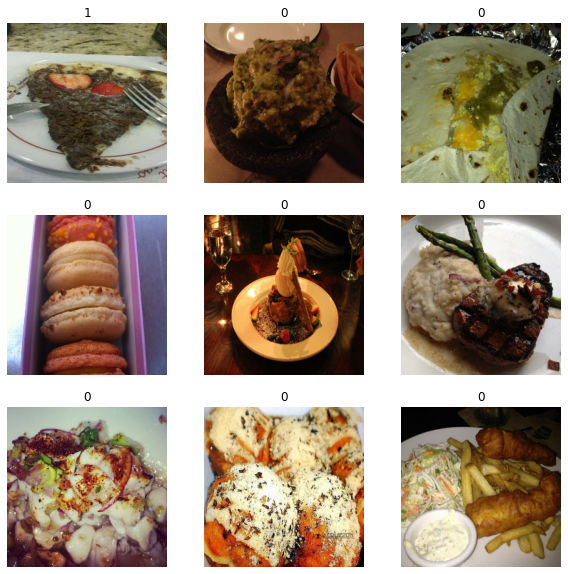

In [12]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from Dataloader import load_image_dataset
import random
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input

In [13]:
#Load image datasets using your Dataloader module
train_ds, valid_ds = load_image_dataset("/home/randolpwanjiru/DSP4380/Computer Vision/archive (17)/pizza_not_pizza")

Found 202 files belonging to 2 classes.
Using 162 files for training.
Found 202 files belonging to 2 classes.
Using 40 files for validation.


* using MobileNetV2 from keras

In [16]:
def build_mobilenet_model(input_shape, num_classes):
    # Load the MobileNetV2 model without the top (fully connected) layers
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the convolutional layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers on top of the base model
    x = base_model.output
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.25)(x)
    output = Dense(num_classes, activation='sigmoid')(x)  # Assuming binary classification

    # Create the final model
    model = Model(inputs=base_model.input, outputs=output)

    return model

In [15]:
# Define input shape and number of classes
input_shape = (224, 224, 3)  # Assuming images of size 224x224 and 3 channels (RGB)
num_classes = 1  # Assuming binary classification

# Build the model
model = build_mobilenet_model(input_shape, num_classes)

# Compile the model
lr = 0.0001
model.compile(optimizer=Adam(learning_rate=lr),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model (assuming you have train_generator and validation_generator)
history = model.fit(train_ds, epochs=10, validation_data=valid_ds)


2024-04-24 19:54:56.786806: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32112640 exceeds 10% of free system memory.
2024-04-24 19:54:56.859196: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32112640 exceeds 10% of free system memory.
2024-04-24 19:54:56.911138: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32112640 exceeds 10% of free system memory.


Epoch 1/10


2024-04-24 19:55:00.368306: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32112640 exceeds 10% of free system memory.
2024-04-24 19:55:00.643618: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32112640 exceeds 10% of free system memory.


6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4688 - loss: 2.6236 - val_accuracy: 0.5000 - val_loss: 1.7352
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 953ms/step - accuracy: 0.4966 - loss: 1.5413 - val_accuracy: 0.5500 - val_loss: 0.6889
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 799ms/step - accuracy: 0.6659 - loss: 0.6021 - val_accuracy: 0.6000 - val_loss: 0.6553
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 942ms/step - accuracy: 0.7452 - loss: 0.5407 - val_accuracy: 0.7500 - val_loss: 0.5695
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 812ms/step - accuracy: 0.7913 - loss: 0.4474 - val_accuracy: 0.7500 - val_loss: 0.5561
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 962ms/step - accuracy: 0.8446 - loss: 0.3677 - val_accuracy: 0.7000 - val_loss: 0.5386
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 921ms/step - accuracy: 0.9161 - loss: 0.2955 - val_accuracy: 0.7500 - val_loss: 0.5005
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8810 - loss: 0.2956 - val_accuracy: 0.7750 - val_loss: 0.4915
Epoch 9/

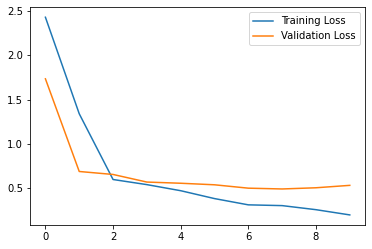

In [17]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

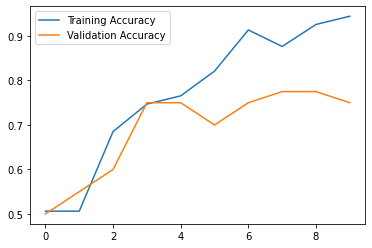

In [18]:
plt.plot(range(len(history.history["accuracy"])),history.history["accuracy"],label="Training Accuracy")
plt.plot(range(len(history.history["val_accuracy"])),history.history["val_accuracy"],label="Validation Accuracy")
plt.legend()

In [19]:
#model.save("TrainBaseModel.keras")

In [20]:
import tensorflow as tf

# Save the model in SavedModel format
tf.saved_model.save(model, 'TrainBaseModel')

INFO:tensorflow:Assets written to: TrainBaseModel/assets


INFO:tensorflow:Assets written to: TrainBaseModel/assets
